|    |Bucket list|
|----|----------------------------------|
|[ v]|fijarse si hay nulos en los campos|
|[ v]|calcular edad|
|[ v]|crear formato fecha|




# ANALISIS EXPLORATORIO TP1 POSTULACIONES 




### Preguntas:

Cual es el modelo de negocio de la empresa? Si genera mas postulaciones, genera mas dinero?

Hay alguna tendencia en el nivel educativo por sexo? 

~~Promedio de edad por sexo.~~  

~~Postulaciones/vistas promedio de los postulantes.~~

Influye la edad/nivel educativo en la cantidad de vistas.

La gente con nivel educativo "mayor", realiza menos postulaciones? 

~~Mapa de calor de los dias y horarios de las postulaciones/vistas para ver tendencias, tendencias de meses (ej decae las postulaciones en enero-marzo). Diferencia horaria entre vistas y psotulaciones (promedio entre que alguien ve una publicacion y se postula)~~       _hay solo dos meses_

~~En que rubro la gente mas ve y se postula.~~ _lo hice con nivel educativo alcanzado sec y universitario_

~~Tasa de postulacion de trabajos part-time, full-time. Influye la edad/nivel educativo en el tipo de trabajo buscado?~~ _solo lo hice con el nivel educativo alcanzado_

Ver sexo, edad y rubro de las postulaciones

Ver si en las postulaciones esta la remuneracion y sacar promedio. 

Para los modelos predictivos: ofrecer postulaciones part time/full time para el segmento correspondiente. 
Al sacar el comportamiento por nivel educativo finalizado, ofrecer rubros de ofertas dependiendo del nivel educativo. 
(ejcon nivel sec finalizado y universitario y en curso ofrecer trabajos part time, ventas) 

### cosas a definir:

tratamos postulantes unicos? 

Tenemos 6 dataframes:

fiuba_1_postulantes_educacion.csv (nivel educativo)

fiuba_2_postulantes_genero_y_edad.csv (fecha de nacimiento y genero)

fiuba_3_vistas.csv(vistas de avisos online y offline)

fiuba_4_postulaciones.csv(postulaciones hasta el 1ro de marzo 2018)

fiuba_5_avisos_online.csv(avisos online al 8 de marzo de 2018)

fiuba_6_avisos_detalle.csv(detalle de avisos vistos y postulados tanto offline como online)


dudas sobre el data set, que contiene los avisos online o el aviso offline??

Infiere el genero en la edad de las postulantes?



In [1]:
#importaciones
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
import pandas as pd
import numpy as np
import math
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import _converter
%matplotlib inline 
plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
#plt.rcParams['figure.figsize'] = (20, 10)

sns.set(style="whitegrid") # seteando tipo de grid en seaborn

#### Educacion de los postulantes

In [2]:
df_post_edu = pd.read_csv("../datos_navent_fiuba/fiuba_1_postulantes_educacion.csv")
df_post_edu.sample(3)

,idpostulante,nombre,estado
72713,X9xOW6J,Universitario,Graduado
165087,6rLXvG4,Universitario,Abandonado
75638,NzjN0VJ,Secundario,Graduado


In [3]:
df_post_edu.isnull().sum()

idpostulante    0
nombre          0
estado          0
dtype: int64

In [4]:
print (df_post_edu.shape)
print (df_post_edu["idpostulante"].value_counts().count())

(298231, 3)
188752


Se ve que hay postulantes que tienen mas de un nivel educación.

In [5]:
#estas son las variables categoricas de nombre de educacion y estado

df_post_edu.groupby(["nombre","estado"]).count()

idpostulante
nombre            estado                  
Doctorado         Abandonado            15
                  En Curso              94
                  Graduado             105
Master            Abandonado           144
                  En Curso            1519
                  Graduado            1935
Otro              Abandonado           947
                  En Curso            4919
                  Graduado           18882
Posgrado          Abandonado           317
                  En Curso            2239
                  Graduado            4831
Secundario        Abandonado          3156
                  En Curso            3995
                  Graduado          103105
Terciario/Técnico Abandonado          5692
                  En Curso           15032
                  Graduado           27009
Universitario     Abandonado         14955
                  En Curso           50733
                  Graduado           38607

#### Edad y genero de los postulantes

In [6]:
df_gen_edad = pd.read_csv("../datos_navent_fiuba/fiuba_2_postulantes_genero_y_edad.csv", parse_dates=['fechanacimiento'])
df_gen_edad.head(3)

#hay que hacer la resta del dia de hoy para obtener la edad.

,idpostulante,fechanacimiento,sexo
0,NM5M,1970-12-03,FEM
1,5awk,1962-12-04,FEM
2,ZaO5,1978-08-10,FEM


In [7]:
print (df_gen_edad.shape)
print (df_gen_edad["idpostulante"].value_counts().count())

(200888, 3)
200888


Los valores son unicos entonces no tenemos la educacion de todos los postulanes

In [8]:
# limpieza de fechas invalidas
df_gen_edad["fechanacimiento"] = pd.to_datetime(df_gen_edad["fechanacimiento"], errors="coerce")

def calc_edad(x):    
    if (pd.isnull(x)):
        return -1
    return math.floor((datetime.datetime.today()-x).days / 365)

# calculo edad para cada postulante
df_gen_edad["edad"] = df_gen_edad["fechanacimiento"].apply(calc_edad)

In [9]:
print(df_gen_edad.shape)
print(df_gen_edad.loc[df_gen_edad['edad']>0].shape)

(200888, 4)
(196131, 4)


Esto indica que hay fechas no validad que al crear la columna edad se setearon negativo.

/usr/local/lib/python3.5/dist-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


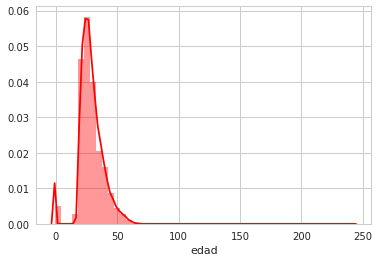

In [10]:
df_f = df_gen_edad.loc[df_gen_edad['edad']> 0]
sns.distplot(df_gen_edad['edad'], color='red', rug=False)

Se observa que hay edades muy altas cercanas a los 250. Filtramos las edades hasta 80 años

/usr/local/lib/python3.5/dist-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


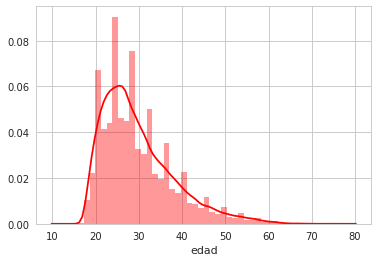

In [11]:
df = df_f.loc[df_f['edad']<80]
sns.distplot(df['edad'], color='red', rug=False)

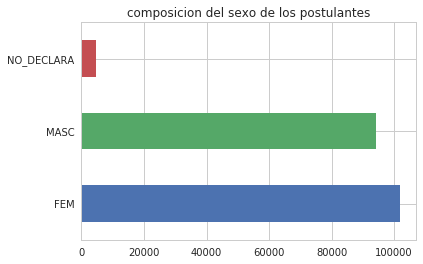

In [13]:
df_gen_edad["sexo"].value_counts().plot(kind="barh", title= "composicion del sexo de los postulantes")

#### VISTAS Y POSTUALCIONES

In [14]:
df_vistas = pd.read_csv("../datos_navent_fiuba/fiuba_3_vistas.csv", parse_dates=['timestamp'])
df_postulaciones = pd.read_csv("../datos_navent_fiuba/fiuba_4_postulaciones.csv", parse_dates=['fechapostulacion'])

In [15]:
print(df_vistas.shape)
print(df_vistas.isnull().sum())
df_vistas.sample(3)

(961897, 3)
idAviso         0
timestamp       0
idpostulante    0
dtype: int64


,idAviso,timestamp,idpostulante
595659,1112341819,2018-02-27 16:13:23.480,ekOwR2B
774805,1112366915,2018-02-28 13:25:35.029,qekr99R
850256,1112320672,2018-02-28 18:10:02.486,0zPbPvv


In [30]:
df_vistas['date'] = df_vistas['timestamp'].dt.date
df_vistas.head()

,idAviso,timestamp,idpostulante,date
0,1111780242,2018-02-23 18:38:13.187,YjVJQ6Z,2018-02-23
1,1112263876,2018-02-23 18:38:14.296,BmVpYoR,2018-02-23
2,1112327963,2018-02-23 18:38:14.329,wVkBzZd,2018-02-23
3,1112318643,2018-02-23 18:38:17.921,OqmP9pv,2018-02-23
4,1111903673,2018-02-23 18:38:18.973,DrpbXDP,2018-02-23


In [17]:
print(df_postulaciones.shape)
print(df_postulaciones.isnull().sum())
df_postulaciones.sample(3)

(3401623, 3)
idaviso             0
idpostulante        0
fechapostulacion    0
dtype: int64


,idaviso,idpostulante,fechapostulacion
1080980,1112196813,Nz0rxXM,2018-02-13 14:12:18
1122490,1112344110,bOjKldb,2018-02-21 17:50:01
1084981,1112368053,ZDP6wD1,2018-02-28 09:18:46


In [32]:
df_postulaciones['pdate'] = df_postulaciones['fechapostulacion'].dt.date
df_postulaciones.head()

,idaviso,idpostulante,fechapostulacion,pdate
0,1112257047,NM5M,2018-01-15 16:22:34,2018-01-15
1,1111920714,NM5M,2018-02-06 09:04:50,2018-02-06
2,1112346945,NM5M,2018-02-22 09:04:47,2018-02-22
3,1112345547,NM5M,2018-02-22 09:04:59,2018-02-22
4,1112237522,5awk,2018-01-25 18:55:03,2018-01-25


In [33]:
df_postulaciones.dtypes

idaviso                      int64
idpostulante                object
fechapostulacion    datetime64[ns]
pdate                       object
dtype: object

Analisis del rango de fechas

In [38]:
idx1 = pd.Index(df_vistas['date']).drop_duplicates()
idx2 = pd.Index(df_postulaciones['pdate']).drop_duplicates()
idx=idx1.union(idx2)
idx.drop_duplicates()
df = pd.DataFrame(index = idx)
df.head()

""
2018-01-15
2018-01-16
2018-01-17
2018-01-18
2018-01-19


In [40]:

df['vistas'] = df.index.to_series().apply(lambda x: 1 if x >= df_vistas['date'].min() and x <= df_vistas['date'].max() else np.NaN)
df.sample(5)

,vistas
2018-01-24,NaN
2018-02-24,1.0
2018-01-17,NaN
2018-02-17,NaN
2018-02-03,NaN


In [41]:
df['postulaciones'] = df.index.to_series().apply(lambda x: 2 if x >= df_postulaciones['pdate'].min() and x <= df_postulaciones['pdate'].max() else np.NaN)


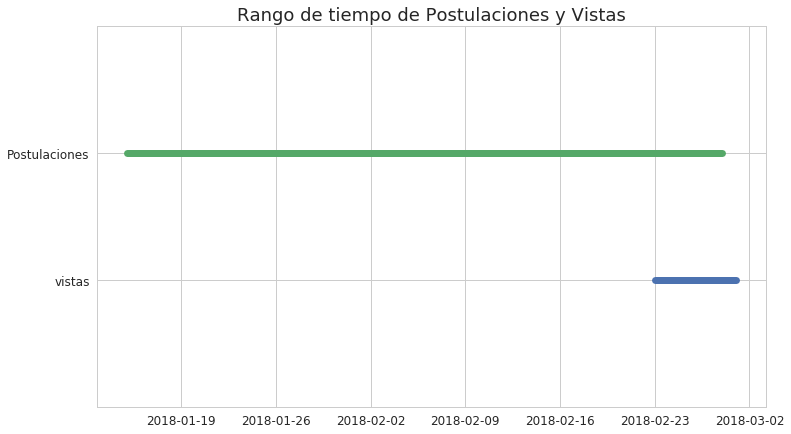

In [81]:
p = df.plot(ylim=[0, 3], legend=False, title ='Rango de tiempo de Postulaciones y Vistas'
            , figsize =(12,7), lw=7, fontsize=12)
p.set_yticks([1., 2.])
p.set_yticklabels(['vistas', 'Postulaciones'])
#p.set_xlabel('Tiempo', size = 15)
p.title.set_size(18)

Se ve que el que menos rango de tiempo ocupa es el vistas entonces se trabaja con el min de vistas y el max de postulaciones

In [87]:
print ("max:",df_vistas['date'].min())
print ("min:",df_postulaciones['pdate'].max())
print (df_postulaciones['pdate'].max()-df_vistas['date'].min())

max: 2018-02-23
min: 2018-02-28
5 days, 0:00:00


####  POSTULACIONES

In [ ]:
df_post = pd.read_csv("/home/kevin/Documents/orga datos/datos_navent_fiuba/fiuba_4_postulaciones.csv")
df_post.head(3)

#### AVISOS

In [ ]:
df_avisos_online = pd.read_csv("/home/kevin/Documents/orga datos/datos_navent_fiuba/fiuba_5_avisos_online.csv")

df_avisos_detalle = pd.read_csv("/home/kevin/Documents/orga datos/datos_navent_fiuba/fiuba_6_avisos_detalle.csv")

In [ ]:
df_avisos_detalle.head(10)

In [ ]:
df_avisos_online.head(5)
# Que info nos da que el aviso sea online o no, o a que se refiere???

bueno, cosas interesantes de aca: tipo de trabajo, area y relacionarlo con el nivel educativo. Tambien por genero,nivel